In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import ConvexHull
from scipy import interpolate
# Read the coordinates data from the pickle file
coordinates = pd.read_pickle('coordinates.pkl')
coordinates.keys()

Index(['Composite:GPSLatitude', 'Composite:GPSLongitude'], dtype='object')

## **`_Preprocessing data_`**

In [ ]:
# Read the coordinates data from the pickle file
coordinates = pd.read_pickle('coordinates.pkl')

# Select the columns for normalization and standardization
columns_to_scale = coordinates.keys()
data = coordinates[columns_to_scale]

# Apply normalization using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
coordinates[columns_to_scale] = normalized_data

# Apply standardization using StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
coordinates[columns_to_scale] = standardized_data
coordinates

## **`_cluster_coordinates_`**

In [3]:
def cluster_coordinates(coordinates):
    """
        Cluster the given coordinates using Gaussian Mixture Models (GMM) and K-means algorithm.

        Args:
            coordinates (pd.DataFrame): A dataframe containing latitude and longitude coordinates.

        Returns:
            tuple: A tuple containing the updated coordinates dataframe with a 'cluster' column and the number of clusters.

        Example:
            >>> coordinates = pd.DataFrame({'Latitude': [40.7128, 41.8781, 37.7749], 'Longitude': [-74.0060, -87.6298, -122.4194]})
            >>> result = cluster_coordinates(coordinates)
            >>> result
            (   Latitude  Longitude  cluster
            0   40.7128   -74.0060        0
            1   41.8781   -87.6298        1
            2   37.7749  -122.4194        2, 3)
    """
    bics = []
    if len(coordinates)>1:
        ks = np.arange(1,len(coordinates))

        for k in ks:
            gmm = GaussianMixture(n_components=k, covariance_type='full')
            gmm.fit(coordinates)
            bics.append(gmm.bic(coordinates))

        index_max = np.argmin(bics)
        num_clusters = ks[index_max] #if list_cluster else 2

        kmeans = KMeans(n_clusters=num_clusters,n_init='auto', random_state=0)
        cluster_labels = kmeans.fit_predict(coordinates)

        coordinates['cluster'] = cluster_labels
    else:
        num_clusters = 0
        coordinates['cluster'] = num_clusters
        
    return coordinates,num_clusters

In [4]:
coordinates,num_clusters=cluster_coordinates(coordinates)
print(f"numer of cluster is  : {num_clusters}")

numer of cluster is  : 4


In [5]:
coordinates

,Composite:GPSLatitude,Composite:GPSLongitude,cluster
2,-1.042398,1.171913,1
3,-1.048183,1.172778,1
4,-1.077191,1.129491,3
5,-1.048179,1.172775,1
6,-1.077185,1.129492,3
7,-1.048179,1.172775,1
8,-1.077188,1.129491,3
9,-1.077187,1.129491,3
10,2.146165,0.217652,2
11,2.144362,0.218761,2


## **`_plot data_`**

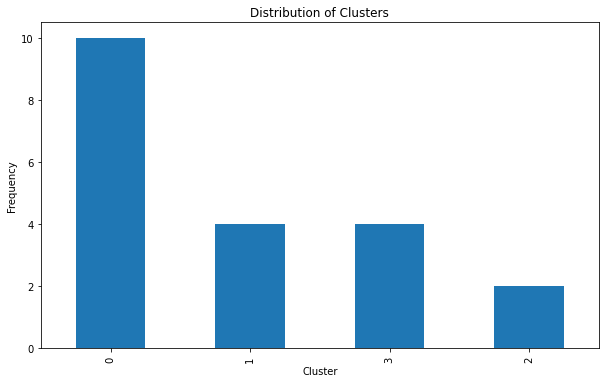

In [6]:
# Display cluster distribution
cluster_counts = coordinates['cluster'].value_counts()
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Clusters')
plt.show()

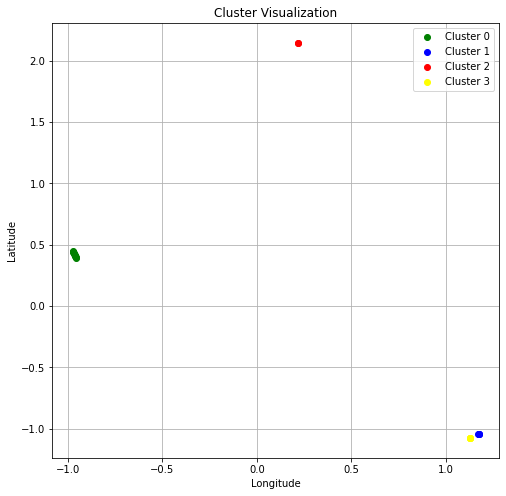

In [7]:
# Plotting clusters
colors = ['green', 'blue', 'red', 'yellow']

plt.figure(figsize=(8, 8))
for cluster_id in range(num_clusters):
    cluster_points = coordinates[coordinates['cluster'] == cluster_id]
    plt.scatter(cluster_points['Composite:GPSLongitude'], 
                cluster_points['Composite:GPSLatitude'],
                color=colors[cluster_id], label=f'Cluster {cluster_id}')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()